In [1]:
from __future__ import absolute_import, division, print_function

from keras import Sequential

# Import TensorFlow and TensorFlow Datasets
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)

# Helper libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random 

# Improve progress bar display
#import tqdm
#import tqdm.auto
#tqdm.tqdm = tqdm.auto.tqdm

random.seed(42)

print(tf.__version__)
#print(keras.__version__)

# This will go away in the future.
# If this gives an error, you might be running TensorFlow 2 or above
# If so, the just comment out this line and run this cell again
#tf.enable_eager_execution() 

Using TensorFlow backend.


1.4.0


In [2]:
stock = pd.read_csv('dow_jones_up_nextday.csv')


In [3]:
corr_matrix = stock.corr()
corr_matrix["UP"].sort_values(ascending=False)

UP                           1.000000
RSI                          0.332973
StochaticOscillator          0.309453
William%R                    0.309453
CrossPrice                   0.254527
StochaticOscillatorSignal    0.237688
MoneyFlowIndex               0.236465
UltimateOscillator           0.215754
bb_high_indicator            0.168448
CrossMM                      0.117072
TrueStrengthIndex            0.037346
Low                          0.031404
Open                         0.030952
Close                        0.030755
High                         0.030523
Adj Close                    0.029494
AwesomeOscillator            0.026123
MM4                          0.025677
MM9                          0.023190
MM18                         0.022231
Volume                       0.006663
Unnamed: 0                   0.001787
Change                       0.000101
bb_low_indicator            -0.141648
Name: UP, dtype: float64

In [4]:
# Split train/sets
from sklearn.model_selection import train_test_split

# Criar tabela com 'features', e com respectiva label (UP)
y = stock['UP']
#X = output[['RSI','Volume','MoneyFlowIndex','bb_high_indicator','CrossMM']]
X = stock[['Volume','High','Low','RSI','CrossMM','CrossPrice','bb_high_indicator','MoneyFlowIndex','Open','MM4','MM9','MM18','StochaticOscillator', 'William%R', 'UltimateOscillator', 'StochaticOscillatorSignal' ]]

#X = output.drop(['UP'],axis=1)
#Split 
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [5]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(67203, 16)
(22401, 16)
(67203,)
(22401,)


In [6]:
#Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sca = sc.fit_transform(X_train)
X_test_sca = sc.transform(X_test)

In [7]:
X_train_sca

array([[-0.10384951,  0.24958081,  0.25817738, ...,  1.39254967,
         0.50064449,  1.12285875],
       [ 2.81028078, -0.86461125, -0.86293014, ..., -0.24554092,
         0.17460128, -0.15334186],
       [ 0.11720184,  0.54613202,  0.53922898, ...,  0.66766687,
         0.42792635,  0.1527303 ],
       ..., 
       [ 1.07235445, -0.17580815, -0.17686812, ...,  0.7375069 ,
         2.49210841,  1.20123264],
       [-0.00681925, -0.88501038, -0.88375347, ..., -1.72792002,
        -1.73165872, -1.50926052],
       [-0.57031737, -0.85197804, -0.85004789, ...,  0.45045746,
         0.12945599,  0.64462199]])

In [8]:
modelo = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, input_shape=[16],activation=tf.nn.relu), 
    tf.keras.layers.Dense(50,activation=tf.nn.relu), 
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)])


In [9]:
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [10]:
modelo.fit(X_train_sca, y_train, batch_size = 500, epochs = 150, verbose = 1)

Epoch 1/150
67203/67203 [==============================] - 1s - loss: 0.6124 - acc: 0.6587     
Epoch 2/150
67203/67203 [==============================] - 0s - loss: 0.5970 - acc: 0.6732     
Epoch 3/150
67203/67203 [==============================] - 0s - loss: 0.5950 - acc: 0.6745     
Epoch 4/150
67203/67203 [==============================] - 0s - loss: 0.5936 - acc: 0.6751     - ETA: 1s - loss: 0.587
Epoch 5/150
67203/67203 [==============================] - 0s - loss: 0.5926 - acc: 0.6774     
Epoch 6/150
67203/67203 [==============================] - 0s - loss: 0.5913 - acc: 0.6776     
Epoch 7/150
67203/67203 [==============================] - 0s - loss: 0.5901 - acc: 0.6795     
Epoch 8/150
67203/67203 [==============================] - 0s - loss: 0.5886 - acc: 0.6813     
Epoch 9/150
67203/67203 [==============================] - 0s - loss: 0.5873 - acc: 0.6821     
Epoch 10/150
67203/67203 [==============================] - 0s - loss: 0.5862 - acc: 0.6838     
Epoch 11/150
672

67203/67203 [==============================] - 0s - loss: 0.5326 - acc: 0.7319     
Epoch 86/150
67203/67203 [==============================] - 0s - loss: 0.5334 - acc: 0.7311     
Epoch 87/150
67203/67203 [==============================] - 0s - loss: 0.5321 - acc: 0.7305     
Epoch 88/150
67203/67203 [==============================] - 0s - loss: 0.5327 - acc: 0.7309     
Epoch 89/150
67203/67203 [==============================] - 0s - loss: 0.5317 - acc: 0.7321     
Epoch 90/150
67203/67203 [==============================] - 1s - loss: 0.5324 - acc: 0.7327     
Epoch 91/150
67203/67203 [==============================] - 1s - loss: 0.5313 - acc: 0.7328     
Epoch 92/150
67203/67203 [==============================] - 1s - loss: 0.5309 - acc: 0.7330     
Epoch 93/150
67203/67203 [==============================] - 0s - loss: 0.5306 - acc: 0.7320     
Epoch 94/150
67203/67203 [==============================] - 0s - loss: 0.5305 - acc: 0.7333     
Epoch 95/150
67203/67203 [=================

In [11]:
from sklearn.metrics import accuracy_score

y_pred = modelo.predict(X_test_sca)
y_pred = np.argmax(y_pred,axis=1)
accuracy_score(y_test,y_pred)

0.73264586402392751

[[8387 3024]
 [2965 8025]]


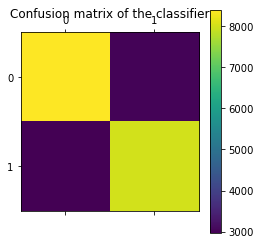

In [12]:
from sklearn.metrics import confusion_matrix
import pylab as pl


cm = confusion_matrix(y_test, y_pred)
print(cm)


pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

In [13]:
# F1_score - (precision and recall: dados train)

from sklearn.metrics import precision_score, recall_score, f1_score

print('Performance de acertos: ',precision_score(y_test, y_pred))
print('True Positive Rate: ',recall_score(y_test,y_pred))
print('F1 Score: ',f1_score(y_test, y_pred))

Performance de acertos:  0.72631007331
True Positive Rate:  0.730209281165
F1 Score:  0.728254458006


In [14]:
print(y_test[12010:12020],y_pred[12010:12020])

47990    1.0
15343    0.0
32013    0.0
40143    1.0
10706    1.0
13022    1.0
80781    0.0
33209    1.0
62869    0.0
9313     0.0
Name: UP, dtype: float64 [1 0 0 1 0 1 0 1 0 0]


In [15]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
#from stockstats import StockDataFrame as Sdf
from ta import *
%matplotlib inline

nome_ficheiro = 'lista_dax.txt'
#nome_ficheiro = 'lista_dowj.csv'

try:
        fhand = open(nome_ficheiro)

except:
        print ('Nao e possivel abrir o ficheiro: ', fhand)


lista_quotes = []

#Cria lista com os ticket do SP500
for f in fhand:
    linha = f.strip().split(',')
    ticker = linha[0]
    lista_quotes.append(ticker)


for quote in lista_quotes:
    try:
        stock = pd.read_csv('dados_actuais_'+quote+'_280419.csv')
        #stock = pd.read_csv('dados_actuais_dowj_'+quote+'_260419.csv')
        output = stock
    except:
        continue    
    
    # Utilizando a livaria 'ta'
    # Add bollinger band high indicator filling NaN values
    output['bb_high_indicator'] = bollinger_hband_indicator(output["Close"], n=20, ndev=2, fillna=True)
    # Add bollinger band low indicator filling NaN values
    output['bb_low_indicator'] = bollinger_lband_indicator(output["Close"], n=20, ndev=2, fillna=True)
    # Adicionar Money Flow Index
    output['MoneyFlowIndex'] = money_flow_index(output["High"],output["Low"],output["Close"],output["Volume"],n=14, fillna=True)
    # Adicionar AwesomeOscillator
    output['AwesomeOscillator'] = ao(output["High"],output["Low"], s=5, l=34, fillna=True)
    # Adicionar Stochatic Oscillator
    output['StochaticOscillator'] = stoch(output["High"],output["Low"],output["Close"], n=14, fillna=True)
    # Adicionar Stochatic Oscillator Signal
    output['StochaticOscillatorSignal'] = stoch_signal(output["High"],output["Low"],output["Close"], n=14, d_n=3, fillna=True)
    # Adicionar True Strength Index
    output['TrueStrengthIndex'] = tsi(output["Close"], r=25, s=13, fillna=True)
    # Adicionar Ultimate Oscillator
    output['UltimateOscillator'] = uo(output["High"],output["Low"],output["Close"], s=7, m=14, l=28, ws=4.0, wm=2.0, wl=1.0, fillna=True)
    # Adicionar William % R
    output['William%R'] = wr(output["High"],output["Low"],output["Close"], lbp=14, fillna=True)
    # Adicionar RSI
    output['RSI'] = rsi(output["Close"], n=14, fillna=True)
    
    # Adicionar features (MM4,MM9,MM18) e uma label (1=Subiu, 0=Desceu)

    output['Change'] = output['Close'].pct_change()
    output['UP'] = np.where(output['Change'] >= 0.0,1,0)
    output['MM4'] = output['Close'].rolling(window=4).mean()
    output['MM9'] = output['Close'].rolling(window=9).mean()
    output['MM18'] = output['Close'].rolling(window=18).mean()
    output['CrossMM'] = np.where(output['MM4'] > output['MM18'],1.0,0.0)
    output['CrossPrice'] = np.where(output['Open'] > output['MM18'],1.0,0.0)
    
    # Preencher os dados em falta

    media4 = output['MM4'].mean()
    media9 = output['MM9'].mean()
    media18 = output['MM18'].mean()
    output['MM4'].fillna(media4, inplace=True)
    output['MM9'].fillna(media9, inplace=True)
    output['MM18'].fillna(media18, inplace=True)
    output['Change'].fillna(0, inplace=True)    
    
    
    # Criar tabela com 'features', e com respectiva label (UP)
    y = output['UP']
    X = output[['Volume','High','Low','RSI','CrossMM','CrossPrice','bb_high_indicator','MoneyFlowIndex','Open','MM4','MM9','MM18','StochaticOscillator', 'William%R', 'UltimateOscillator', 'StochaticOscillatorSignal' ]]

    #Split 
    
    tamanho_t = len(X)
    terco = int(tamanho_t/3)
    tr = tamanho_t - terco
    
    
    X_train = X.head(tr)
    X_test  = X.tail(terco)
    y_train = y.head(tr)
    y_test = y.tail(terco)
    
    #Scaling

    sc = StandardScaler()
    X_train_sca = sc.fit_transform(X_train)
    X_test_sca = sc.transform(X_test)
    
        
    y_pred = modelo.predict(X_test_sca).astype(np.double).round(decimals=1)[-5:]
    print('Valor Binário (0)', quote, '-->', y_pred)
    
    
    #print('Valor Binário (0)', quote, '-->', obj.predict(X_test_sca)[-5:])    
    #print('Valor Probabilistico', quote, '-->', (obj.predict_proba(X_test_sca)[:,1]).astype(np.double).round(decimals=3)[-5:])
    #print('----------------------------------------')

Valor Binário (0) ADS.DE --> [[ 0.   1. ]
 [ 0.   1. ]
 [ 0.1  0.9]
 [ 1.   0. ]
 [ 0.9  0.1]]
Valor Binário (0) ALV.DE --> [[ 0.   1. ]
 [ 0.   1. ]
 [ 0.6  0.4]
 [ 0.9  0.1]
 [ 0.   1. ]]
Valor Binário (0) BAS.DE --> [[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
Valor Binário (0) BAYN.DE --> [[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
Valor Binário (0) BEI.DE --> [[ 0.9  0.1]
 [ 0.4  0.6]
 [ 0.3  0.7]
 [ 1.   0. ]
 [ 1.   0. ]]
Valor Binário (0) BMW.DE --> [[ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
Valor Binário (0) CBK.DE --> [[ 0.   1. ]
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]]
Valor Binário (0) CON.DE --> [[ 0.  1.]
 [ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 0.  1.]]
Valor Binário (0) DAI.DE --> [[ 0.2  0.8]
 [ 0.   1. ]
 [ 1.   0. ]
 [ 1.   0. ]
 [ 1.   0. ]]
Valor Binário (0) DB1.DE --> [[ 0.6  0.4]
 [ 0.5  0.5]
 [ 0.1  0.9]
 [ 0.8  0.2]
 [ 1.   0. ]]
Valor Binário (0) DBK.DE --> [[ 0.  1.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]
 [ 1.  0.]]
Valo